In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# file_path = '/content/drive/My Drive/Colab Notebooks/Eksperimen/NLP FraudGuard/frauddata.csv'

In [3]:
import pandas as pd

df = pd.read_csv('frauddata.csv')
df

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal
1140,Mba mau kirim 300 ya,normal
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal


In [4]:
df['label'].value_counts()

label
normal      569
penipuan    335
promo       239
Name: count, dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df = df.drop_duplicates()
df

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal
1140,Mba mau kirim 300 ya,normal
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal


In [7]:
def lowercase(text) :
  return text.lower()

df['Clean_Teks'] = df['Teks'].apply(lowercase)
df

C:\Users\PC\AppData\Local\Temp\ipykernel_4256\3230417395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Teks'].apply(lowercase)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,[promo] beli paket flash mulai 1gb di my telko...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,"2016-07-08 11:47:11.plg yth, sisa kuota flash ..."
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,"2016-08-07 11:29:47.plg yth, sisa kuota flash ..."
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,4.5gb/30 hari hanya rp 55 ribu spesial buat an...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,"yooo sama2, oke nanti aku umumin di grup kelas"
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,😁 sebelumnya ga ad nulis kerudung. kirain warn...
1140,Mba mau kirim 300 ya,normal,mba mau kirim 300 ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama1 beaok bwrangkat pagi...mau cas atay tra...


In [8]:
import string, re

def remove_punctuations(text) :

  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F926-\U0001F937"
                           u"\U00010000-\U0010FFFF"
                           u"\U0001F601"
                           "]+", flags=re.UNICODE)

  text_no_emoji = emoji_pattern.sub(r'', text)

  # remove number
  text_no_number = re.sub(r"\d+", "", text)

  #remove punctuation
  text_no_punc = text_no_number.translate(str.maketrans("","",string.punctuation))

  #remove whitespace leading & trailing
  text_no_space = text_no_punc.strip()

  #remove multiple whitespace into single whitespace
  text_clear = re.sub('\s+',' ',text_no_space)

  return text_clear

df['Clean_Teks'] = df['Clean_Teks'].apply(remove_punctuations)
df

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PC\AppData\Local\Temp\ipykernel_4256\997355174.py:28: SyntaxWarning: invalid escape sequence '\s'
  text_clear = re.sub('\s+',' ',text_no_space)
C:\Users\PC\AppData\Local\Temp\ipykernel_4256\997355174.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(remove_punctuations)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari hanya rp ribu spesial buat anda yang t...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash anda kb download myte...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash anda kb download myte...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari hanya rp ribu spesial buat anda yang t...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,yooo sama oke nanti aku umumin di grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,😁 sebelumnya ga ad nulis kerudung kirain warna...
1140,Mba mau kirim 300 ya,normal,mba mau kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama beaok bwrangkat pagimau cas atay tranfer


In [9]:
def word_repetition(text):
  return re.sub(r'(.)\1+', r'\1\1', text)

df['Clean_Teks'] = df['Clean_Teks'].apply(word_repetition)

C:\Users\PC\AppData\Local\Temp\ipykernel_4256\1046272115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(word_repetition)


In [10]:
! pip install Sastrawi

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, StopWordRemoverFactory

In [12]:
factory = StopWordRemoverFactory()

stopwords = factory.get_stop_words()
stopword = factory.create_stop_word_remover()

In [13]:
def stopwords(text) :
  return stopword.remove(text)

df['Clean_Teks'] = df['Clean_Teks'].apply(stopwords)
df

C:\Users\PC\AppData\Local\Temp\ipykernel_4256\500032056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(stopwords)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rp ribu spesial buat yang terpilih akt...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash kb download mytelkoms...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash kb download mytelkoms...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rp ribu spesial buat yang terpilih akt...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,yoo sama oke aku umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,😁 sebelumnya ga ad nulis kerudung kirain warna...
1140,Mba mau kirim 300 ya,normal,mba mau kirim
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama beaok bwrangkat pagimau cas atay tranfer


In [14]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar','nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(text):
    global re_banned_words
    return re_banned_words.sub("", text)

df['Clean_Teks'] = df['Clean_Teks'].apply(lambda banned:RemoveBannedWords(banned))

C:\Users\PC\AppData\Local\Temp\ipykernel_4256\2818796215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(lambda banned:RemoveBannedWords(banned))


In [15]:
slang_file = '/content/drive/My Drive/Colab Notebooks/Eksperimen/NLP FraudGuard/slang.txt'
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

In [16]:
slangs

<_io.TextIOWrapper name='slang.txt' mode='r' encoding='utf-8'>

In [17]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [18]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [19]:
from textblob import TextBlob
import nltk
nltk.download('punkt')


clean_text = []
for review in df['Clean_Teks']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

df['Clean_Teks'] = clean_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\PC\AppData\Local\Temp\ipykernel_4256\3356148992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = clean_text


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stem_sentence(sentence):
    words = sentence.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_sentence = ' '.join(stemmed_words)

    return stemmed_sentence

df['Clean_Teks'] = df['Clean_Teks'].apply(stem_sentence)
df

C:\Users\PC\AppData\Local\Temp\ipykernel_4256\1656825684.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(stem_sentence)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,ya sama oke aku umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,belum tidak ada nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,normal,mba mau kirim
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama besok berangkat pagimau cas atau tranfer


In [21]:
from collections import Counter
# Top 10 common words
all_words = ' '.join(df['Clean_Teks']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)
print(common_words)

[('yang', 186), ('tidak', 176), ('informasi', 157), ('nomor', 150), ('sudah', 140), ('mau', 131), ('kalau', 129), ('aku', 127), ('hadiah', 122), ('hari', 115)]


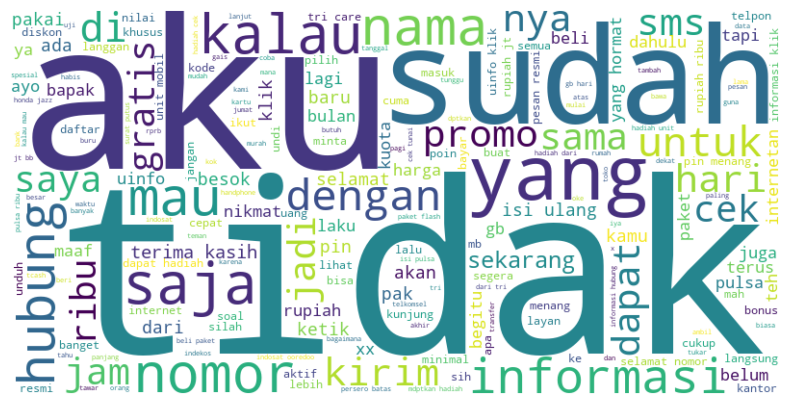

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Augmentation

In [23]:
! pip install nltk wordnet

  Using cached wordnet-0.0.1b2.tar.gz (8.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [10 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\PC\AppData\Local\Temp\pip-install-ygd2_wg5\wordnet_eb0073ac0b6d45d8a1473757c74cc0d4\setup.py", line 24, in <module>
          long_description=read('README.md'),
                           ^^^^^^^^^^^^^^^^^
        File "C:\Users\PC\AppData\Local\Temp\pip-install-ygd2_wg5\wordnet_eb0073ac0b6d45d8a1473757c74cc0d4\setup.py", line 7, in read
          return open(os.path.join(os.path.dirname(__file__), fname),'Ur').read()
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ValueError: invalid mode: 'Ur'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encoun

In [24]:
import random
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to get synonyms from WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Synonym replacement function
def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return ' '.join(new_words)

# Random insertion function
def random_insertion(sentence, n):
    words = sentence.split()
    for _ in range(n):
        new_word = get_synonyms(random.choice(words))
        if new_word:
            words.insert(random.randint(0, len(words)), random.choice(new_word))
    return ' '.join(words)

# Random swap function
def swap_word(sentence):
    words = sentence.split()
    if len(words) < 2:
        return sentence
    idx1, idx2 = random.sample(range(len(words)), 2)
    words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_swap(sentence, n):
    for _ in range(n):
        sentence = swap_word(sentence)
    return sentence

# Random deletion function
def random_deletion(sentence, p):
    words = sentence.split()
    if len(words) == 1:
        return sentence

    new_words = []
    for word in words:
        if random.uniform(0, 1) > p:
            new_words.append(word)

    if len(new_words) == 0:
        return random.choice(words)
    
    return ' '.join(new_words)

# Combine augmentation techniques
def augment_text(sentence):
    augmentations = [synonym_replacement, random_insertion, random_swap, random_deletion]
    random.shuffle(augmentations)
    augmented_sentence = sentence
    for aug in augmentations:
        if aug == random_deletion:
            augmented_sentence = aug(augmented_sentence, 0.2)
        else:
            augmented_sentence = aug(augmented_sentence, 2)
    return augmented_sentence

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
# Apply text augmentation
df['Augmented_Teks'] = df['Clean_Teks'].apply(augment_text)

# Combine original and augmented data with labels
df_augmented = df[['Augmented_Teks', 'label']].copy()
df_augmented.columns = ['Clean_Teks', 'label']
df_combined = pd.concat([df[['Clean_Teks', 'label']], df_augmented])

# Save the augmented data to a new CSV file
df_combined.to_csv('augmented_frauddata.csv', index=False)


C:\Users\PC\AppData\Local\Temp\ipykernel_4256\1725363282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Augmented_Teks'] = df['Clean_Teks'].apply(augment_text)


## Tokenizing

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

def fit_tokenizer(text, num_words, oov_token):
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(text)

    return tokenizer

tokenizer = fit_tokenizer(df_combined['Clean_Teks'], NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 4381 words

<OOV> token included in vocabulary


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def seq_and_pad(text, tokenizer, padding, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(text)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, maxlen = maxlen, padding = padding)

    return padded_sequences

padded_seq = seq_and_pad(df_combined['Clean_Teks'], tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {padded_seq.shape}\n")

Padded training sequences have shape: (2284, 120)



In [28]:
df_combined

,Clean_Teks,label
0,promo beli paket flash mulai gb my telkomsel a...,promo
1,gb hari rupiah ribu spesial buat yang pilih ak...,promo
2,paling yang hormat sisa kuota flash kb unduh m...,promo
3,paling yang hormat sisa kuota flash kb unduh m...,promo
4,gb hari rupiah ribu spesial buat yang pilih ak...,promo
...,...,...
1138,grup ya Aku sama kelas,normal
1139,kerudung belum tidak adenosine_deaminase adeno...,normal
1140,Master_in_Business mau kirim,normal
1141,tranfer besok pagimau atau,normal


In [29]:
import pickle

with open('tokenizer.bin', 'wb') as f:
    pickle.dump(tokenizer, f)

# save clean data's dataframe to csv
df_combined.to_csv('data_cleaned.csv', index=False)

## CONTINUE MODELLING

In [30]:
# from google.colab import drive
# import pandas as pd

# drive.mount('/content/drive')

# df_path = '/content/drive/My Drive/Colab Notebooks/Eksperimen/NLP FraudGuard/data_cleaned.csv'

df = pd.read_csv('data_cleaned.csv')
df

,Clean_Teks,label
0,promo beli paket flash mulai gb my telkomsel a...,promo
1,gb hari rupiah ribu spesial buat yang pilih ak...,promo
2,paling yang hormat sisa kuota flash kb unduh m...,promo
3,paling yang hormat sisa kuota flash kb unduh m...,promo
4,gb hari rupiah ribu spesial buat yang pilih ak...,promo
...,...,...
2279,grup ya Aku sama kelas,normal
2280,kerudung belum tidak adenosine_deaminase adeno...,normal
2281,Master_in_Business mau kirim,normal
2282,tranfer besok pagimau atau,normal


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

def fit_tokenizer(text, num_words, oov_token):
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(text)

    return tokenizer

tokenizer = fit_tokenizer(df['Clean_Teks'], NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

from tensorflow.keras.preprocessing.sequence import pad_sequences

def seq_and_pad(text, tokenizer, padding, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(text)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, maxlen = maxlen, padding = padding)

    return padded_sequences

padded_seq = seq_and_pad(df['Clean_Teks'], tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {padded_seq.shape}\n")

Vocabulary contains 4381 words

<OOV> token included in vocabulary
Padded training sequences have shape: (2284, 120)



In [32]:
df["label_encode"] = df['label'].replace({"normal": 0, "penipuan": 1, "promo": 2})
df

C:\Users\PC\AppData\Local\Temp\ipykernel_4256\403606457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label_encode"] = df['label'].replace({"normal": 0, "penipuan": 1, "promo": 2})


,Clean_Teks,label,label_encode
0,promo beli paket flash mulai gb my telkomsel a...,promo,2
1,gb hari rupiah ribu spesial buat yang pilih ak...,promo,2
2,paling yang hormat sisa kuota flash kb unduh m...,promo,2
3,paling yang hormat sisa kuota flash kb unduh m...,promo,2
4,gb hari rupiah ribu spesial buat yang pilih ak...,promo,2
...,...,...,...
2279,grup ya Aku sama kelas,normal,0
2280,kerudung belum tidak adenosine_deaminase adeno...,normal,0
2281,Master_in_Business mau kirim,normal,0
2282,tranfer besok pagimau atau,normal,0


In [33]:
X = padded_seq
X.shape

(2284, 120)

In [34]:
from tensorflow.keras.utils import to_categorical
import numpy as np

Y = np.array(df['label_encode'])
y = to_categorical(Y)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, SpatialDropout1D, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

early_stop = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test), callbacks=[early_stop, reduce_lr], verbose=2)

# Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", score[1])

Epoch 1/50
27/27 - 13s - 495ms/step - accuracy: 0.6159 - loss: 2.9279 - val_accuracy: 0.6515 - val_loss: 2.6640 - learning_rate: 0.0010
Epoch 2/50
27/27 - 8s - 305ms/step - accuracy: 0.8797 - loss: 1.7019 - val_accuracy: 0.8004 - val_loss: 1.9057 - learning_rate: 0.0010
Epoch 3/50
27/27 - 8s - 305ms/step - accuracy: 0.9504 - loss: 1.0429 - val_accuracy: 0.8914 - val_loss: 1.4449 - learning_rate: 0.0010
Epoch 4/50
27/27 - 9s - 316ms/step - accuracy: 0.9691 - loss: 0.6926 - val_accuracy: 0.8949 - val_loss: 1.1596 - learning_rate: 0.0010
Epoch 5/50
27/27 - 9s - 330ms/step - accuracy: 0.9802 - loss: 0.4642 - val_accuracy: 0.8984 - val_loss: 0.9614 - learning_rate: 0.0010
Epoch 6/50
27/27 - 14s - 506ms/step - accuracy: 0.9837 - loss: 0.3325 - val_accuracy: 0.9422 - val_loss: 0.7597 - learning_rate: 0.0010
Epoch 7/50
27/27 - 11s - 424ms/step - accuracy: 0.9877 - loss: 0.2375 - val_accuracy: 0.9527 - val_loss: 0.6282 - learning_rate: 0.0010
Epoch 8/50
27/27 - 10s - 358ms/step - accuracy: 0.99

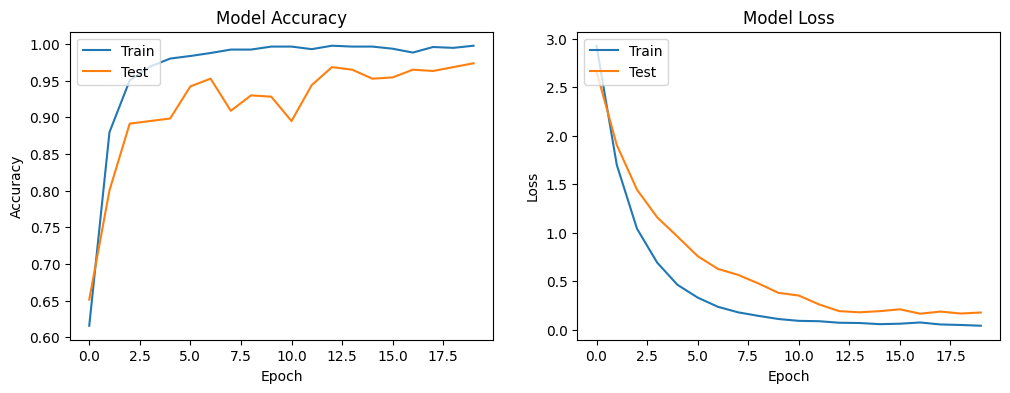

In [38]:
# Acc and Loss

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


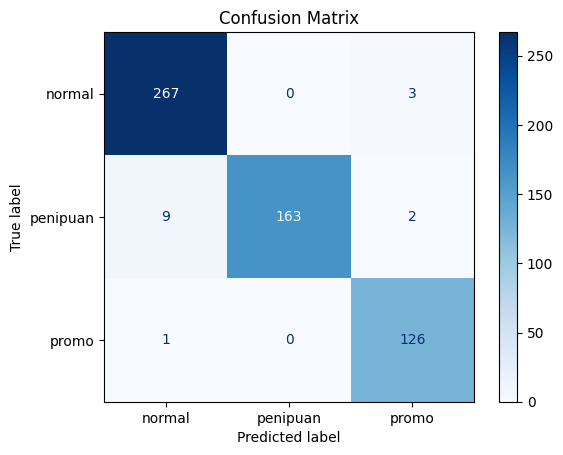

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=["normal", "penipuan", "promo"])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [40]:
# # Menyimpan model ke file .h5
# model.save('model.h5')

In [41]:
# import tensorflow as tf

# # Konversi model ke TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter._experimental_lower_tensor_list_ops = False
# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)